In [3]:
#### importing of pakages
import pandas as pd
import seaborn as sns
import math as m
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [4]:
data = pd.read_csv('startup.csv')

In [5]:
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [6]:
print(data.columns)
print(data.dtypes)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')
R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [7]:
print(data.State.unique())

['New York' 'California' 'Florida']


In [8]:
data.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [9]:
#### Filter the Data based on State -
Florida = data[data['State']=='Florida']
Florida.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
Florida.Administration.var()

641586317.2309934

C:\Users\Aishwarya21\AppData\Local\Temp\ipykernel_13352\767008538.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Florida.corr(),annot = True,cmap = 'RdBu')


<Axes: >

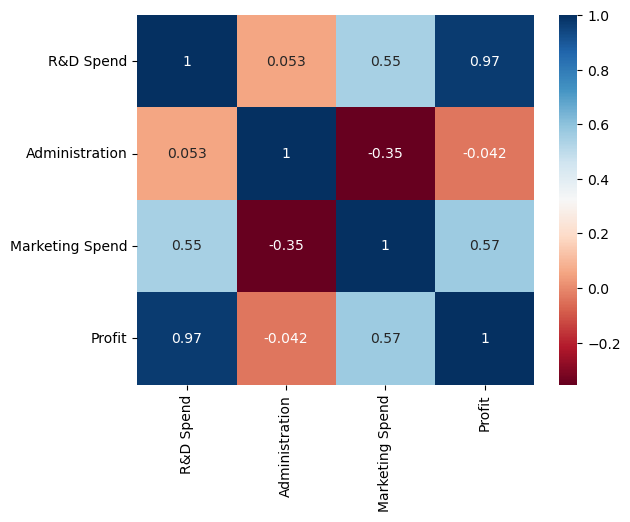

In [11]:
#### Transformation are used to scale down the data in the normal distributed
sns.heatmap(Florida.corr(),annot = True,cmap = 'RdBu')

In [12]:
Florida[['R&D Spend','Administration','Marketing Spend','Profit']]

,R&D Spend,Administration,Marketing Spend,Profit
2,153441.51,101145.55,407934.54,191050.39
4,142107.34,91391.77,366168.42,166187.94
7,130298.13,145530.06,323876.68,155752.60
10,101913.08,110594.11,229160.95,146121.95
12,93863.75,127320.38,249839.44,141585.52
14,119943.24,156547.42,256512.92,132602.65
18,91749.16,114175.79,294919.57,124266.90
22,73994.56,122782.75,303319.26,110352.25
23,67532.53,105751.03,304768.73,108733.99
26,75328.87,144135.98,134050.07,105733.54


In [13]:
X = Florida[['R&D Spend','Administration','Marketing Spend']]
Y = Florida['Profit']

In [14]:
model = LinearRegression()
model_train = model.fit(X,Y)
print("model Training Completed")

model Training Completed


In [15]:
model_train.coef_

array([ 0.81385258, -0.12777446,  0.00309665])

In [16]:
model_train.intercept_

67869.65758237045

In [17]:
pred = model_train.predict
pred(X)

array([181087.83671653, 172980.44233199, 156321.03278211, 137390.40778854,
       128766.28365041, 146277.33980867, 128864.45933783, 113341.09358066,
       110262.6612082 , 111174.46070196,  98654.2820947 , 103830.22358436,
       100530.08452921,  75586.01223658,  80255.816955  ,  55061.95269325])

In [19]:
Florida['pred_profit'] = pred


C:\Users\Aishwarya21\AppData\Local\Temp\ipykernel_13352\835514046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Florida['pred_profit'] = pred


In [1]:
##### Accuracy of the model - rsquare value - co-efficient
round(r2_score(Florida['Profit'],Florida['pred_Profit'])*100,2)

NameError: name 'r2_score' is not defined

In [22]:
rmse =m.sqrt(mean_squared_error(Florida['Profit'],Florida['pred_Profit']))
rmse

KeyError: 'pred_Profit'

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [54]:
X_train.shape

(12, 3)

In [ ]:
##### Support vector machine (svm)------
from sklearn.svm import SVC
clf =model_svm.fit(x_train,y_train)
clf
pred = clf.predict(x_train)
pred
confusion_matrix(y_test,pred)